## matplotlib 画图demo大全
包括了一些matplotlib 基础的绘图demo 仅供参考 并未涉及特别高级的特性
采用plt 内部状态机的方式绘图 没有采用面向对象的方式操作

1. 对象式操作  figure(画布)->axes(区域子画布)->axis(轴)->Artist
(标题xx)  
2. 过程式操作  使用全局plt对象按照顺序操作 推荐使用过程式 应为教程里面就是这个

In [16]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

%matplotlib inline

### 单个普通图 （线形图 plot 点状图scatter 条状图bar 直方图hist）

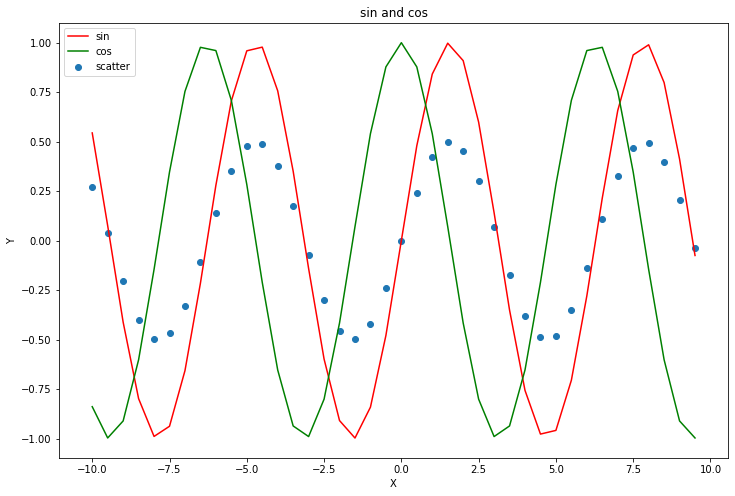

In [17]:
# 在指定filure之后 可以往上面堆放各种图形
plt.figure(0, figsize=(12, 8)) # 切换画布 使用内部状态机记录 
x = np.arange(-10, 10, 0.5)
y1 = np.sin(x)
y2 = np.cos(x)
# 参数 x, y, 线形("r", "ro") 
plt.plot(x, y1, "r", label="sin") #
plt.plot(x, y2, "g", label="cos") #
plt.scatter(x, y1 / 2, label="scatter")
plt.ylabel('Y')
plt.xlabel('X')
plt.legend() # 添加图例 将plot对象中的 lable 的对应关系显示出来
plt.title("sin and cos")
plt.show()

#### 柱状图

<Figure size 432x288 with 0 Axes>

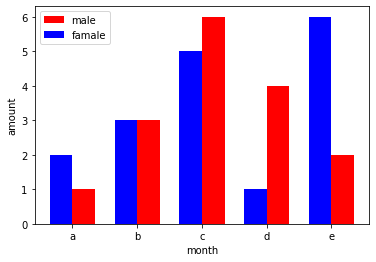

In [18]:
plt.figure(6) #plt创建figure
fig, ax = plt.subplots() #设定子图 这一步是为了获得 plt 绑定的figure对象以及 axes对象
#后续的对x轴山文本的设置 只面向于axes
x = np.array([1, 2, 3, 4, 5])  
y1 = np.array([1, 3, 6, 4, 2])
y2 = np.array([2, 3, 5, 1, 6])
width = 0.35 #需要一个柱宽度变量 
# 在绘制每一组bar的过程中x 是柱中心点的横坐标 
# 以x为中心的柱宽度范围内是一个柱
# 在一张图上画两组柱状图 需要把柱中心错开 
ax.bar(x + width / 2, y1, width=width, color='red', label="male") 
ax.bar(x - width / 2, y2, width=width, color='blue', label="famale")
ax.set_xticks(x) 
ax.set_xticklabels(list("abcde"))

plt.xlabel("month")
plt.ylabel("amount")
ax.legend()
#plt.set_xticklabels(["a", "b", "c", "d", "e"])
plt.show()

#### 直方图

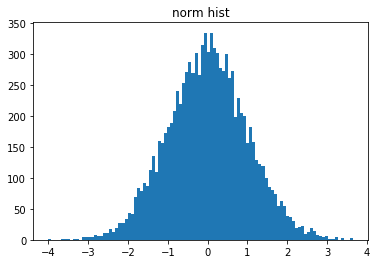

In [19]:
plt.figure(2) # 切换画布 使用内部状态机记录 
#x = np.arange(-10, 10, 0.5)
#print(x.shape)
y = np.random.randn(10000)
#直方图因为Y是样本的计数 所以直接把一维的数据传入即可
plt.hist(y,bins=100) #分桶可以直接根据指定桶的数量来指定 内部调用 numpy.histogram对数据分组 这样分桶区间是等分的
plt.title("norm hist")
plt.show()

### 多个子图

/Users/songziheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/songziheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/songziheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


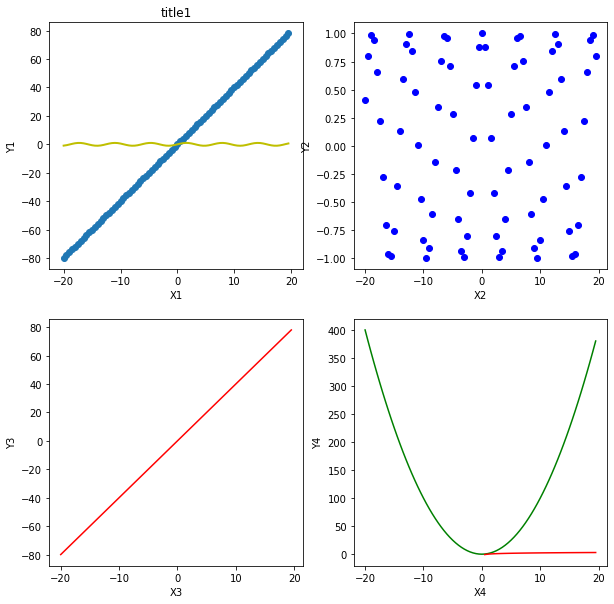

In [20]:
plt.figure(3, figsize=(10, 10)) #先指定大画布
plt.subplot(221) #指定子画布

#生成数据 
x = np.arange(-20, 20, 0.5)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = x*4
y4 = x**2
y5 = np.log(x)

#(x, y. color)
plt.subplot(221) # 百位表示 一行有几个子图 十位表示一列有几个子图 个位表示在所有图中的第几个
plt.plot(x, y1,"y", linewidth=2)
plt.scatter(x, y3)
plt.ylabel('Y1')
plt.xlabel('X1')
plt.title("title1")

plt.subplot(222)
#(x, y. color)
plt.plot(x, y2,"bo")
plt.ylabel('Y2')
plt.xlabel('X2')

plt.subplot(223) #切换 子图索引
plt.plot(x,y3,"r")
plt.ylabel('Y3')
plt.xlabel('X3')

plt.subplot(224) #切换 子图索引
plt.plot(x, y4, "g")
plt.plot(x, y5, "r")
plt.ylabel('Y4')
plt.xlabel('X4')
plt.show()

### 双Y坐标轴图  
主要函数   
**x1.twinx()**  

In [21]:
dataDf = {
    "x": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "y1": [9, 8, 8, 7, 7, 6, 6, 5, 2, 1],
    "y2": [0.1, 0.3, 0.6, 0.8, 0.9, 0.9, 0.7, 0.5, 0.3, 0.1]
}

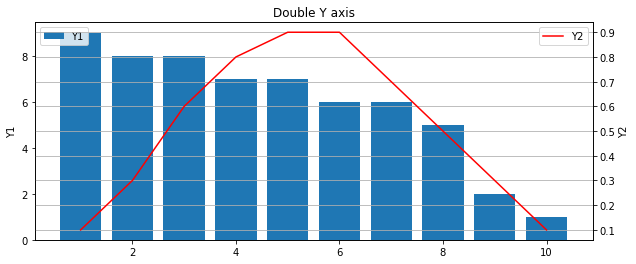

In [22]:
fig = plt.figure(1, figsize=(10, 4))
x = dataDf["x"]
y1 = dataDf["y1"]
y2 = dataDf["y2"]
ax1 = fig.add_subplot(111)
ax1.bar(x, y1, label="Y1")
ax1.set_ylabel('Y1')
ax1.set_title("Double Y axis")
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # this is the important function
ax2.plot(x, y2, 'r', label='Y2')
ax2.set_ylabel('Y2')
ax2.set_xlabel('X')
plt.grid()
ax2.legend() # 添加图例 将plot对象中的 lable 的对应关系显示出来
#plt.bar(sortedDf["duration"][:200], sortedDf["count"][:200], label='count')
#plt.plot(sortedDf["duration"][:200],sortedDf["accumlate_percent"][:200])
plt.show()

### 热度图（颜色根据第三个维度确定）
[matplotlib 内建颜色映射](https://matplotlib.org/gallery/color/colormap_reference.html)
颜色值对照表可以通过norm函数进行归一化

In [23]:
x = np.arange(-10, 10, 0.05) #间距越小画出来的分辨率越高
y = np.arange(-10, 10, 0.05)
x_grid, y_grid = np.meshgrid(x, y) #画三维图需要把x y所画出的矩形内的所有点组成的栅格点集选出来
z_grid = np.sin(np.sqrt(x_grid**2 + y_grid**2)) #以点到原点的距离作为sin函数的自变量

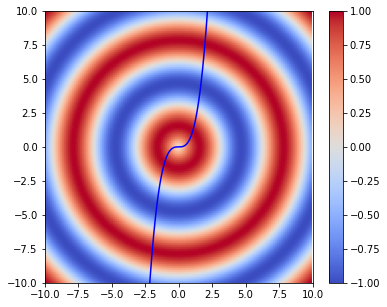

In [24]:
plt.figure(4, figsize=(6, 5))
#plt.figure(2)
#cmap = plt.get_cmap('RdBu')
im = plt.pcolormesh(x_grid, y_grid, z_grid, cmap="coolwarm")
plt.plot(x, x**3, "b")
plt.xlim(-10, 10) #设置整个图像的范围
plt.ylim(-10, 10) 
plt.colorbar() 
# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show(1)

In [25]:
x = np.arange(-5, 5, 0.25) # x y 只是指定一个范围 即x y分别取什么值
y = np.arange(-5, 5, 0.25) 
x_grid, y_grid = np. meshgrid(x, y) # 将范围中的x y 生成一个面中所有的点 也就是对x y取笛卡尔积 生成的x_grid y_grid 
z = np.sin(x_grid + y_grid)

In [26]:
print(x.shape)
print(y.shape)
print(z.shape)

(40,)
(40,)
(40, 40)


### 3D绘图

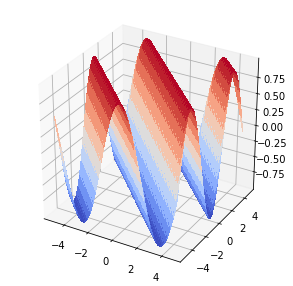

In [27]:
fig = plt.figure(5,figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x_grid, y_grid, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
plt.show(1)

### 显示多张图片
matplotlib 可以直接将 如下形式的矩阵作为图片显示
```
The image data. Supported array shapes are:

(M, N): an image with scalar data. The data is visualized using a colormap.
(M, N, 3): an image with RGB values (float or uint8).
(M, N, 4): an image with RGBA values (float or uint8), i.e. including transparency.
The first two dimensions (M, N) define the rows and columns of the image.

The RGB(A) values should be in the range [0 .. 1] for floats or [0 .. 255] for integers. Out-of-range values will be clipped to these bounds.
```

In [28]:
img = np.random.randint(0, 255, (30, 30), dtype=np.uint8)

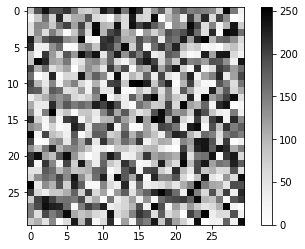

In [29]:
plt.figure(10)
#
plt.imshow(img, cmap=plt.cm.Greys)  #灰度的图
plt.colorbar() #添加颜色值对照表 
plt.show(1)

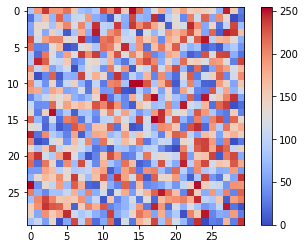

In [30]:
plt.figure(11)
plt.imshow(img, cmap="coolwarm")  #可以更改 colormap
plt.colorbar()
plt.show(1)

(79, 76, 3)


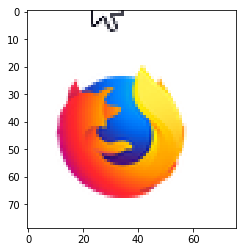

In [14]:
import cv2 #读取一般图片需要opencv辅助
plt.figure()
color_img = cv2.imread("p.png")
print(color_img.shape)

#应为opencv中的存储顺序是BGR 而非RGB 所以需要对每个像素中的三个通道的值进行翻转才可以实现正常显示
for r in range(color_img.shape[0]):
    for c in range(color_img.shape[1]):
        color_img[r][c] = np.array(list(reversed(color_img[r][c])))

plt.imshow(color_img)  #可以更改 colormap
plt.show()